## Import standard libraries

In [2]:
import os
import sys
# append coeqwal packages to path
sys.path.append('./coeqwalpackage')
import datetime as dt
import pandas as pd
import numpy as np
import cqwlutils as cu
import re
import matplotlib.pyplot as plt

## Import custom modules

In [3]:
# Import custom modules - NEED WINDOWS OS (NOTE: I had to run this twice, must check why this happens!)
from coeqwalpackage.DataExtraction import *
from coeqwalpackage.metrics import *


## Define contol file name

In [4]:
CtrlFile = 'CalSim3GroundWaterDataExtractionInitFile_v1.xlsx'
CtrlTab = 'Init'

## Read from control file

In [5]:
ScenarioListFile, ScenarioListTab, ScenarioListPath, GW1DssNamesOutPath, GW2DssNamesOutPath, ScenarioIndicesOutPath, DssDirsOutPath, VarListPath, VarListFile, VarListTab, VarOutPath, DataOutPath, ConvertDataOutPath, ExtractionSubPath, DemandDeliverySubPath, ModelSubPath, GroupDataDirPath, ScenarioDir, GW1DssMin, GW1DssMax, GW2DssMin, GW2DssMax, NameMin, NameMax, DirMin, DirMax, IndexMin, IndexMax, StartMin, StartMax, EndMin, EndMax, VarMin, VarMax, DemandFilePath, DemandFileName, DemandFileTab, DemMin, DemMax, InflowOutSubPath, InflowFilePath, InflowFileName, InflowFileTab, InflowMin, InflowMax = cu.read_init_file(CtrlFile, CtrlTab)

In [6]:
print([ScenarioListFile, ScenarioListTab, ScenarioListPath, GW1DssNamesOutPath, GW2DssNamesOutPath, ScenarioIndicesOutPath, DssDirsOutPath, VarListPath, VarListFile, VarListTab, VarOutPath, DataOutPath, ConvertDataOutPath, ExtractionSubPath, DemandDeliverySubPath, ModelSubPath, GroupDataDirPath, ScenarioDir, GW1DssMin, GW1DssMax, GW2DssMin, GW2DssMax, NameMin, NameMax, DirMin, DirMax, IndexMin, IndexMax, StartMin, StartMax, EndMin, EndMax, VarMin, VarMax, DemandFilePath, DemandFileName, DemandFileTab, DemMin, DemMax, InflowOutSubPath, InflowFilePath, InflowFileName, InflowFileTab, InflowMin, InflowMax])


['coeqwal_GW_scenario_listing_v1.xlsx', 'scenario_list', '../../CalSim3_Model_Runs/Scenarios\\coeqwal_GW_scenario_listing_v1.xlsx', '../../CalSim3_Model_Runs/Scenarios\\Group_Data_Extraction\\DVDssNamesFrom_coeqwal_GW_scenario_listing_v1.csv', '../../CalSim3_Model_Runs/Scenarios\\Group_Data_Extraction\\SVDssNamesFrom_coeqwal_GW_scenario_listing_v1.csv', '../../CalSim3_Model_Runs/Scenarios\\Group_Data_Extraction\\IndicesFrom_coeqwal_GW_scenario_listing_v1.csv', '../../CalSim3_Model_Runs/Scenarios\\Group_Data_Extraction\\DirNamesFrom_coeqwal_GW_scenario_listing_v1.csv', '../../CalSim3_Model_Runs/Scenarios\\ground_water_variables_v1.xlsx', 'ground_water_variables_v1.xlsx', 'GroundWaterVars_CS3', '../../CalSim3_Model_Runs/Scenarios\\Group_Data_Extraction\\VarsFrom_ground_water_variables_v1.csv', '../../CalSim3_Model_Runs/Scenarios\\Group_Data_Extraction\\DataFrom_ground_water_variables_v1.csv', '../../CalSim3_Model_Runs/Scenarios\\Group_Data_Extraction\\ConvertDataFrom_ground_water_variabl

## Check for output directory and create if necessary (not necessary)

In [7]:
# check if output directory exists
if not os.path.exists(GroupDataDirPath):
    # print warning
    print("Warning: directory " + GroupDataDirPath + " does not exists and will be created")
    
    # Create the directory
    os.makedirs(GroupDataDirPath)


## Define Nan Values

In [8]:
# NaN values as defined by CalSim3
Nan1 = -901
Nan2 = -902

## Read indeces, dss names, directory names, start and end dates, time range (not necessary)

In [9]:
gw1dsshdr, gw1dssname = cu.read_from_excel(ScenarioListPath, ScenarioListTab, GW1DssMin, GW1DssMax, hdr=True)
gw1dss_names = []
for i in range(len(gw1dssname)):
    gw1dss_names.append(gw1dssname[i][0])
gw1dss_names

['s0001_DCR2023_9.3.1_danube_hist\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0002_DCR2023_9.3.1_danube_adj\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0003_DCR2023_9.3.1_danube_cc50\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0004_DCR2023_9.3.1_danube_cc75\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0005_DCR2023_9.3.1_danube_cc95\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0006_draftDCP_NDDOff_2020\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0007_draftDCP_NDD_SWP3000_2020\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0008_draftDCP_NDD_SWP4500_2020\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0009_draftDCP_NDD_SWP6000_2020\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0010_draftDCP_NDD_SWP6000_Beth_2020\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0011_adjBL_wTUCP\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0012_adj_SGMApump\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0013_DCR-CC75_wTU

In [10]:
gw2dsshdr, gw2dssname = cu.read_from_excel(ScenarioListPath, ScenarioListTab, GW2DssMin, GW2DssMax, hdr=True)
gw2dss_names = []
for i in range(len(gw2dssname)):
    gw2dss_names.append(gw2dssname[i][0])
gw2dss_names

['s0001_DCR2023_9.3.1_danube_hist\\Model_Files\\DSS\\output\\CVGroundwaterBudget.dss',
 's0002_DCR2023_9.3.1_danube_adj\\Model_Files\\DSS\\output\\CVGroundwaterBudget.dss',
 's0003_DCR2023_9.3.1_danube_cc50\\Model_Files\\DSS\\output\\CVGroundwaterBudget.dss',
 's0004_DCR2023_9.3.1_danube_cc75\\Model_Files\\DSS\\output\\CVGroundwaterBudget.dss',
 's0005_DCR2023_9.3.1_danube_cc95\\Model_Files\\DSS\\input\\output\\CVGroundwaterBudget.dss',
 's0006_draftDCP_NDDOff_2020\\Model_Files\\DSS\\output\\CVGroundwaterBudget.dss',
 's0007_draftDCP_NDD_SWP3000_2020\\Model_Files\\DSS\\output\\CVGroundwaterBudget.dss',
 's0008_draftDCP_NDD_SWP4500_2020\\Model_Files\\DSS\\output\\CVGroundwaterBudget.dss',
 's0009_draftDCP_NDD_SWP6000_2020\\Model_Files\\DSS\\output\\CVGroundwaterBudget.dss',
 's0010_draftDCP_NDD_SWP6000_Beth_2020\\Model_Files\\DSS\\output\\CVGroundwaterBudget.dss',
 's0011_adjBL_wTUCP\\Model_Files\\DSS\\output\\CVGroundwaterBudget.dss',
 's0012_adj_SGMApump\\Model_Files\\DSS\\output\\CVG

In [11]:
indexhdr, index_name = cu.read_from_excel(ScenarioListPath, ScenarioListTab, IndexMin, IndexMax, hdr=True)
index_names = []
for i in range(len(index_name)):
    index_names.append(index_name[i][0])
index_names

['s0001',
 's0002',
 's0003',
 's0004',
 's0005',
 's0006',
 's0007',
 's0008',
 's0009',
 's0010',
 's0011',
 's0012',
 's0013',
 's0014',
 's0015',
 's0016',
 's0018']

In [12]:
studyhdr, study_name = cu.read_from_excel(ScenarioListPath, ScenarioListTab, NameMin, NameMax, hdr=True)
study_names = []
for i in range(len(study_name)):
    study_names.append(study_name[i][0])
study_names

['9.3.1_danube_hist',
 '9.3.1_danube_adj',
 '9.3.1_danube_cc50',
 '9.3.1_danube_cc75',
 '9.3.1_danube_cc95',
 's0006_draftDCP_NDDOff_2020',
 's0007_draftDCP_NDD_SWP3000_2020',
 's0008_draftDCP_NDD_SWP4500_2020',
 's0009_draftDCP_NDD_SWP6000_2020',
 's0010_draftDCP_NDD_SWP6000_Beth_2020',
 's0011_adjBL_wTUCP',
 's0012_adj_SGMApump',
 's0013_DCR-CC75_wTUCP',
 's0014_DCR-CC75_SGMApump',
 's0015_SGMApump_wTUCP',
 's0016_DCR-CC75_SGMApump_wTUCP',
 's0018_adj_EflowsV1']

In [13]:
dirhdr, dir_name = cu.read_from_excel(ScenarioListPath, ScenarioListTab, DirMin, DirMax, hdr=True)
dir_names = []
for i in range(len(dir_name)):
    dir_names.append(dir_name[i][0])
dir_names

['s0001_DCR2023_9.3.1_danube_hist',
 's0002_DCR2023_9.3.1_danube_adj',
 's0003_DCR2023_9.3.1_danube_cc50',
 's0004_DCR2023_9.3.1_danube_cc75',
 's0005_DCR2023_9.3.1_danube_cc95',
 's0006_draftDCP_NDDOff_2020',
 's0007_draftDCP_NDD_SWP3000_2020',
 's0008_draftDCP_NDD_SWP4500_2020',
 's0009_draftDCP_NDD_SWP6000_2020',
 's0010_draftDCP_NDD_SWP6000_Beth_2020',
 's0011_adjBL_wTUCP',
 's0012_adj_SGMApump',
 's0013_DCR-CC75_wTUCP',
 's0014_DCR-CC75_SGMApump',
 's0015_SGMApump_wTUCP',
 's0016_DCR-CC75_SGMApump_wTUCP',
 's0018_adj_EflowsV1']

In [14]:
starthdr, start_date = cu.read_from_excel(ScenarioListPath, ScenarioListTab, StartMin, StartMax, hdr=True)
start_dates = []
for i in range(len(start_date)):
    start_dates.append(start_date[i][0])
datetime_start_dates = pd.to_datetime(start_dates)
# turns out that dss reading library wands a dt datetime, not pd datetime
dt_datetime_start_dates = [dt.to_pydatetime() for dt in datetime_start_dates]


In [15]:
endhdr, end_date = cu.read_from_excel(ScenarioListPath, ScenarioListTab, EndMin, EndMax, hdr=True)
end_dates = []
for i in range(len(end_date)):
    end_dates.append(end_date[i][0])
# turns out that dss reading library wands a dt datetime, not pd datetime
datetime_end_dates = pd.to_datetime(end_dates)
dt_datetime_end_dates = [dt.to_pydatetime() for dt in datetime_end_dates]


In [16]:
min_datetime = min(dt_datetime_start_dates)
print('Min time: ')
print(min_datetime)
max_datetime = max(dt_datetime_end_dates)
print('Max time: ')
print(max_datetime)


Min time: 
1921-10-31 00:00:00
Max time: 
2021-09-30 00:00:00


## Read variables list (not necessary)

In [17]:
# get vars
hdr, vars = cu.read_from_excel(VarListPath, VarListTab,VarMin,VarMax,hdr=True)
gw1var_df = pd.DataFrame(data=vars, columns=hdr)
gw1var_df

,Part B:,Part C:
0,LT:E999,PUMPING
1,SR1:L1,GW_STORAGE
2,SR2:L1,GW_STORAGE
3,SR3:L1,GW_STORAGE
4,SR4:L1,GW_STORAGE
...,...,...
194,SR62:L3,GW_STORAGE
195,SR63:L3,GW_STORAGE
196,SR64:L3,GW_STORAGE
197,SR65:L3,GW_STORAGE


## Read the compund data from CSV to df

In [18]:
# read the dataframe from CSV
print('Reading ' + DataOutPath)
gw1_df, gw1dss_names = read_in_df(DataOutPath,GW1DssNamesOutPath)

Reading ../../CalSim3_Model_Runs/Scenarios\Group_Data_Extraction\DataFrom_ground_water_variables_v1.csv


In [19]:
print("gw1dss_names:")
gw1dss_names

gw1dss_names:


['s0001_DCR2023_9.3.1_danube_hist\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0002_DCR2023_9.3.1_danube_adj\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0003_DCR2023_9.3.1_danube_cc50\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0004_DCR2023_9.3.1_danube_cc75\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0005_DCR2023_9.3.1_danube_cc95\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0006_draftDCP_NDDOff_2020\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0007_draftDCP_NDD_SWP3000_2020\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0008_draftDCP_NDD_SWP4500_2020\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0009_draftDCP_NDD_SWP6000_2020\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0010_draftDCP_NDD_SWP6000_Beth_2020\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0011_adjBL_wTUCP\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0012_adj_SGMApump\\Model_Files\\DSS\\output\\CVGroundwaterOut.dss',
 's0013_DCR-CC75_wTU

In [20]:
print("gw1_df:")
gw1_df

gw1_df:


IWFM                               \
                     LT:E999_s0001                SR10:L1_s0001   
                           PUMPING                   GW_STORAGE   
                              1MON                         1MON   
           PUMPING_AT_ALL_ELEMENTS GW_STORAGE_AT_CALSIM_REGIONS   
                           PER-CUM                      PER-CUM   
                               TAF                          TAF   
1921-10-31               -0.489879                    4565.6143   
1921-11-30               -0.175123                    4567.0170   
1921-12-31               -0.121138                    4577.3060   
1922-01-31               -0.107654                    4575.9834   
1922-02-28               -0.255931                    4592.6543   
..                             ...                          ...   
2021-05-31               -2.909803                    4515.9260   
2021-06-30               -2.372584                    4507.4830   
2021-07-31               -1.912345                    4501.7593   
2021-08-31               -2.008060                    4492.0356   
2021-09-30               -1.959299                    4488.5010   

                                                                      \
                          SR10:L2_s0001                SR10:L3_s0001   
                             GW_STORAGE                   GW_STORAGE   
                                   1MON                         1MON   
           GW_STORAGE_AT_CALSIM_REGIONS GW_STORAGE_AT_CALSIM_REGIONS   
                                PER-CUM                      PER-CUM   
                                    TAF                          TAF   
1921-10-31                    3738.8423                     9413.029   
1921-11-30                    3739.4534                     9413.407   
1921-12-31                    3740.1123                     9414.034   
1922-01-31                    3740.3958                     9414.589   
1922-02-28                    3741.3260                     9415.569   
..                                  ...                          ...   
2021-05-31                    3734.8535                     9407.857   
2021-06-30                    3733.3555                     9405.691   
2021-07-31                    3731.9446                     9403.306   
2021-08-31                    3731.9985                     9401.803   
2021-09-30                    3733.1638                     9401.524   

                                                                      \
                          SR11:L1_s0001                SR11:L2_s0001   
                             GW_STORAGE                   GW_STORAGE   
                                   1MON                         1MON   
           GW_STORAGE_AT_CALSIM_REGIONS GW_STORAGE_AT_CALSIM_REGIONS   
                                PER-CUM                      PER-CUM   
                                    TAF                          TAF   
1921-10-31                    4903.5234                    3620.7840   
1921-11-30                    4903.3374                    3622.1665   
1921-12-31                    4908.7720                    3623.2290   
1922-01-31                    4913.5996                    3624.0764   
1922-02-28                    4929.2583                    3625.1330   
..                                  ...                          ...   
2021-05-31                    4640.1797                    3610.0195   
2021-06-30                    4618.6553                    3606.8208   
2021-07-31                    4593.8164                    3603.9067   
2021-08-31                    4574.6504                    3603.1633   
2021-09-30                    4564.2050                    3604.3066   

                                                                      \
                          SR11:L3_s0001                SR12:L1_s0001   
                             GW_STORAGE                   GW_STORAGE   
             

## Drop the LT:E999 columns

In [21]:
mask = ~gw1_df.columns.to_frame().apply(lambda col: col.astype(str).str.contains('LT:E999')).any(axis=1)
gw1_df = gw1_df.loc[:, mask.values]

In [22]:
print("new gw1_df:")
gw1_df

new gw1_df:


IWFM                               \
                          SR10:L1_s0001                SR10:L2_s0001   
                             GW_STORAGE                   GW_STORAGE   
                                   1MON                         1MON   
           GW_STORAGE_AT_CALSIM_REGIONS GW_STORAGE_AT_CALSIM_REGIONS   
                                PER-CUM                      PER-CUM   
                                    TAF                          TAF   
1921-10-31                    4565.6143                    3738.8423   
1921-11-30                    4567.0170                    3739.4534   
1921-12-31                    4577.3060                    3740.1123   
1922-01-31                    4575.9834                    3740.3958   
1922-02-28                    4592.6543                    3741.3260   
..                                  ...                          ...   
2021-05-31                    4515.9260                    3734.8535   
2021-06-30                    4507.4830                    3733.3555   
2021-07-31                    4501.7593                    3731.9446   
2021-08-31                    4492.0356                    3731.9985   
2021-09-30                    4488.5010                    3733.1638   

                                                                      \
                          SR10:L3_s0001                SR11:L1_s0001   
                             GW_STORAGE                   GW_STORAGE   
                                   1MON                         1MON   
           GW_STORAGE_AT_CALSIM_REGIONS GW_STORAGE_AT_CALSIM_REGIONS   
                                PER-CUM                      PER-CUM   
                                    TAF                          TAF   
1921-10-31                     9413.029                    4903.5234   
1921-11-30                     9413.407                    4903.3374   
1921-12-31                     9414.034                    4908.7720   
1922-01-31                     9414.589                    4913.5996   
1922-02-28                     9415.569                    4929.2583   
..                                  ...                          ...   
2021-05-31                     9407.857                    4640.1797   
2021-06-30                     9405.691                    4618.6553   
2021-07-31                     9403.306                    4593.8164   
2021-08-31                     9401.803                    4574.6504   
2021-09-30                     9401.524                    4564.2050   

                                                                      \
                          SR11:L2_s0001                SR11:L3_s0001   
                             GW_STORAGE                   GW_STORAGE   
                                   1MON                         1MON   
           GW_STORAGE_AT_CALSIM_REGIONS GW_STORAGE_AT_CALSIM_REGIONS   
                                PER-CUM                      PER-CUM   
                                    TAF                          TAF   
1921-10-31                    3620.7840                    5802.5635   
1921-11-30                    3622.1665                    5803.2810   
1921-12-31                    3623.2290                    5804.1387   
1922-01-31                    3624.0764                    5804.9980   
1922-02-28                    3625.1330                    5805.9610   
..                                  ...                          ...   
2021-05-31                    3610.0195                    5793.9400   
2021-06-30                    3606.8208                    5791.5280   
2021-07-31                    3603.9067                    5788.8510   
2021-08-31                    3603.1633                    5787.0166   
2021-09-30                    3604.3066                    5786.4824   

                                                                      \
                          SR12:L1_s0001                SR12:L2_s0001   


## Add water year column to df

In [23]:
def add_water_year_column(df):
    df_copy = df.copy().sort_index()
    df_copy['Date'] = pd.to_datetime(df_copy.index)
    df_copy.loc[:, 'Year'] = df_copy['Date'].dt.year
    df_copy.loc[:, 'Month'] = df_copy['Date'].dt.month
    df_copy.loc[:, 'WaterYear'] = np.where(df_copy['Month'] >= 10, df_copy['Year'] + 1, df_copy['Year'])
    return df_copy.drop(["Date", "Year", "Month"], axis=1)

In [24]:
gw1_df = add_water_year_column(gw1_df)

C:\Users\Dino\AppData\Local\Temp\ipykernel_14104\2780952031.py:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  return df_copy.drop(["Date", "Year", "Month"], axis=1)


In [25]:
print("gw1_df with water year column:")
gw1_df

gw1_df with water year column:


IWFM                               \
                          SR10:L1_s0001                SR10:L2_s0001   
                             GW_STORAGE                   GW_STORAGE   
                                   1MON                         1MON   
           GW_STORAGE_AT_CALSIM_REGIONS GW_STORAGE_AT_CALSIM_REGIONS   
                                PER-CUM                      PER-CUM   
                                    TAF                          TAF   
1921-10-31                    4565.6143                    3738.8423   
1921-11-30                    4567.0170                    3739.4534   
1921-12-31                    4577.3060                    3740.1123   
1922-01-31                    4575.9834                    3740.3958   
1922-02-28                    4592.6543                    3741.3260   
..                                  ...                          ...   
2021-05-31                    4515.9260                    3734.8535   
2021-06-30                    4507.4830                    3733.3555   
2021-07-31                    4501.7593                    3731.9446   
2021-08-31                    4492.0356                    3731.9985   
2021-09-30                    4488.5010                    3733.1638   

                                                                      \
                          SR10:L3_s0001                SR11:L1_s0001   
                             GW_STORAGE                   GW_STORAGE   
                                   1MON                         1MON   
           GW_STORAGE_AT_CALSIM_REGIONS GW_STORAGE_AT_CALSIM_REGIONS   
                                PER-CUM                      PER-CUM   
                                    TAF                          TAF   
1921-10-31                     9413.029                    4903.5234   
1921-11-30                     9413.407                    4903.3374   
1921-12-31                     9414.034                    4908.7720   
1922-01-31                     9414.589                    4913.5996   
1922-02-28                     9415.569                    4929.2583   
..                                  ...                          ...   
2021-05-31                     9407.857                    4640.1797   
2021-06-30                     9405.691                    4618.6553   
2021-07-31                     9403.306                    4593.8164   
2021-08-31                     9401.803                    4574.6504   
2021-09-30                     9401.524                    4564.2050   

                                                                      \
                          SR11:L2_s0001                SR11:L3_s0001   
                             GW_STORAGE                   GW_STORAGE   
                                   1MON                         1MON   
           GW_STORAGE_AT_CALSIM_REGIONS GW_STORAGE_AT_CALSIM_REGIONS   
                                PER-CUM                      PER-CUM   
                                    TAF                          TAF   
1921-10-31                    3620.7840                    5802.5635   
1921-11-30                    3622.1665                    5803.2810   
1921-12-31                    3623.2290                    5804.1387   
1922-01-31                    3624.0764                    5804.9980   
1922-02-28                    3625.1330                    5805.9610   
..                                  ...                          ...   
2021-05-31                    3610.0195                    5793.9400   
2021-06-30                    3606.8208                    5791.5280   
2021-07-31                    3603.9067                    5788.8510   
2021-08-31                    3603.1633                    5787.0166   
2021-09-30                    3604.3066                    5786.4824   

                                                                      \
                          SR12:L1_s0001                SR12:L2_s0001   


## Add an extra column with copy of each TOT but with units of feet (divide by area, multiply by 1000 to get units of FT, areas are in the csv file CalSim3_WBA.csv - fid is the SR number, GIS_acres is the area in acres)

## Write this df to DataOutPath (dino will change the initialization)

In [26]:
# gw1_df.to_csv(ConvertDataOutPath, na_rep="NaN", header=True, index=True)

## Create new df from the previous df but with annual average

In [27]:
# gw1_annual_df = gw1_df.resample('Y').mean()

## Write this to csv indicated by AnnualDataOutPath (dino will change the initialization)

In [28]:
# gw1_annual_df.to_csv(ConvertDataOutPath.replace(".csv", "_annual.csv"), na_rep="NaN", header=True, index=True)

## Subset annual df to the 40 something WBA variables (the data that maps SR number and name to WBA number and name is in CalSim3GWregionIndex.wresl, instead of 66 we will have 42)
## ATTENTION: one of the WBA's is actually indxDETAW instead of indxWBA_xx
## The variable names will thus have to be changed from SRxx:TOT to WBAxx:TOT (or in the special case DETAW:TOT)
## Also, the variable names all have indx as a prefix, I think we can get rid of that for clarity, but not if it is a pain

## Write this new df to csv indicated by WBAAnnualDataOutPath (dino will change the initialization)

In [29]:
# the_df_you_produced.to_csv(ConvertDataOutPath.replace(".csv", "_WBA.csv"), na_rep="NaN", header=True, index=True)

## End of initialization

In [30]:
print('Done Initializing!')

Done Initializing!


## Compute trends from annual df in all variables WBAxx:TOT in FT (will have units of FT.YR), use start and end water year (default WY = 1960 to 2021), compute linear fit, get slope of line, write to file (note that some scenarios only go to 2015)

# Example pseudo-code

First subset gw_df to get gw_tot_df with only variables WBA_xx:TOT:

pattern = r'^SR\d+:TOT$'
sr_tot_cols = df.filter(regex=pattern)

Prepare output DataFrame for trend slopes:

gw_tot_slopetrends_df = pd.DataFrame(index is scenario number, columns are variable_trendslope, variable_tier - not yet assigned)

Fit linear trend for each column of gw_tot_df:

x = np.arange(len(gw_tot_df))  # or df.index.values if numeric or ordinal

for col in gw_tot_df.columns:

    y = gw_tot_df[col].values
    
    m, b = np.polyfit(x, y, 1)

    # save trend slope in gw_tot_slopetrends_df (something like gw_tot_slopetrends_df[col + '_trendslope'] = m)

gw_tot_slopetrends_df now has trend slopes for each variable and scenario

write out file gw_tot_slopetrends_df

## Change this to compute the trends from the WBA annual df instead of SR monthly df

Found 1122 matching variables under valid scenarios.


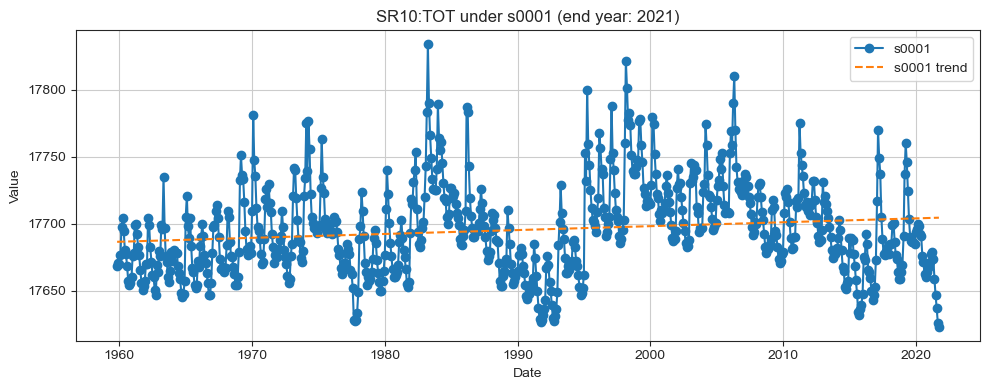

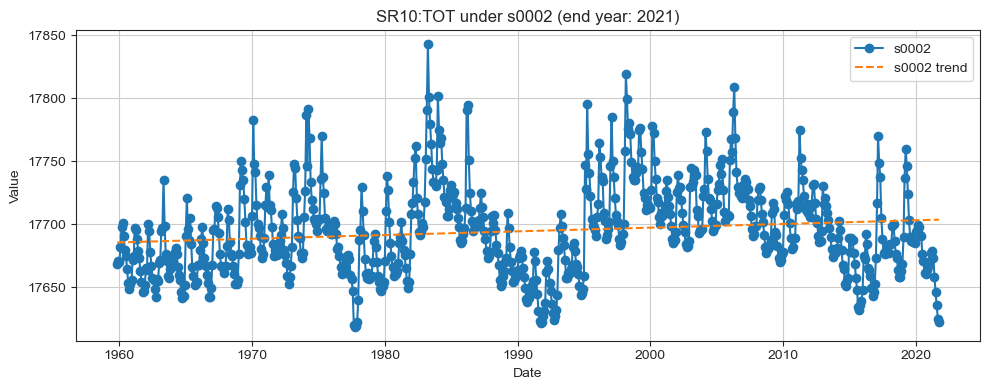

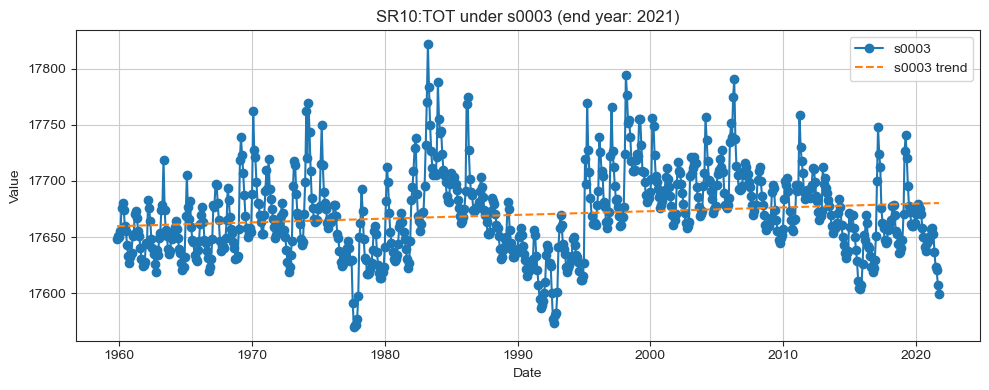

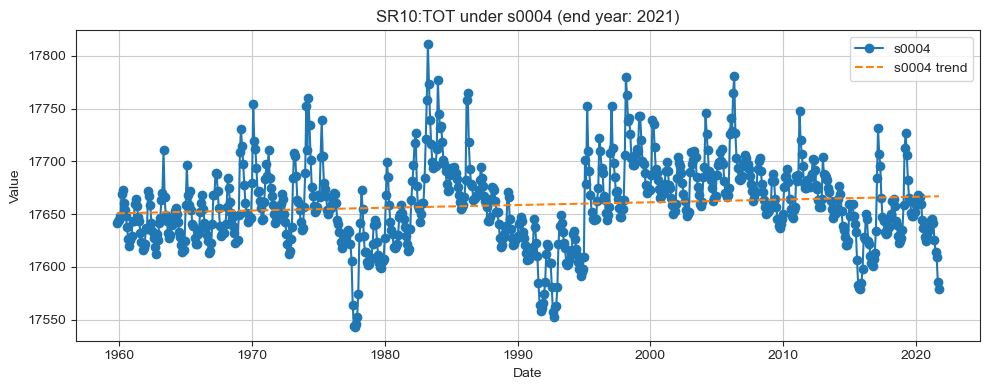

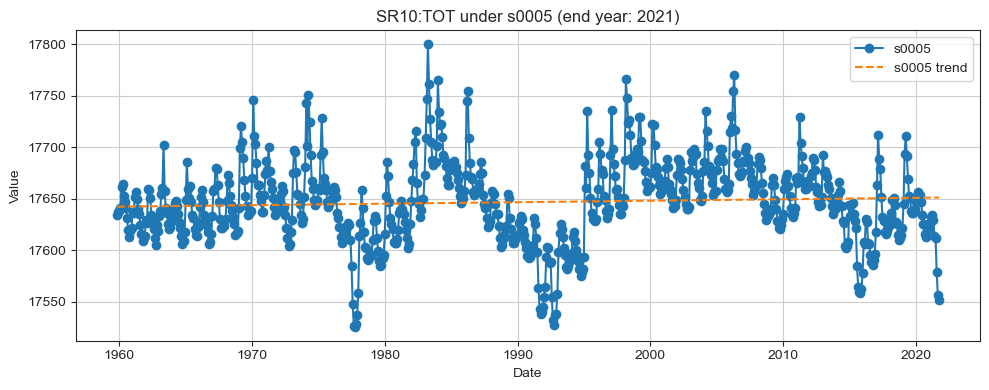

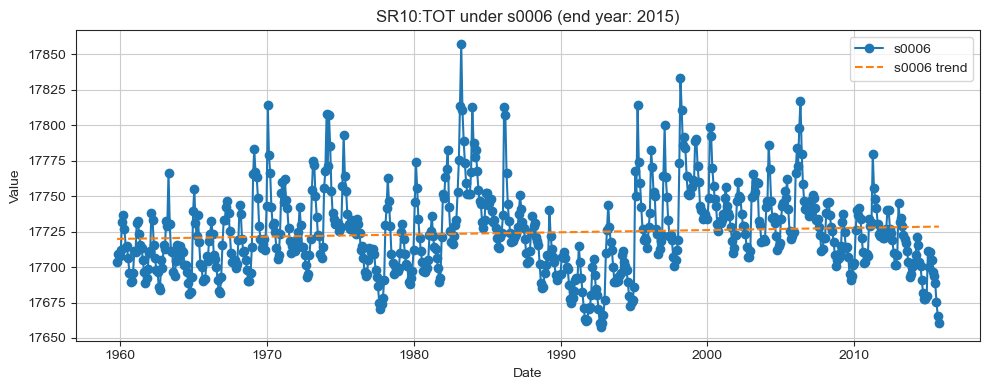

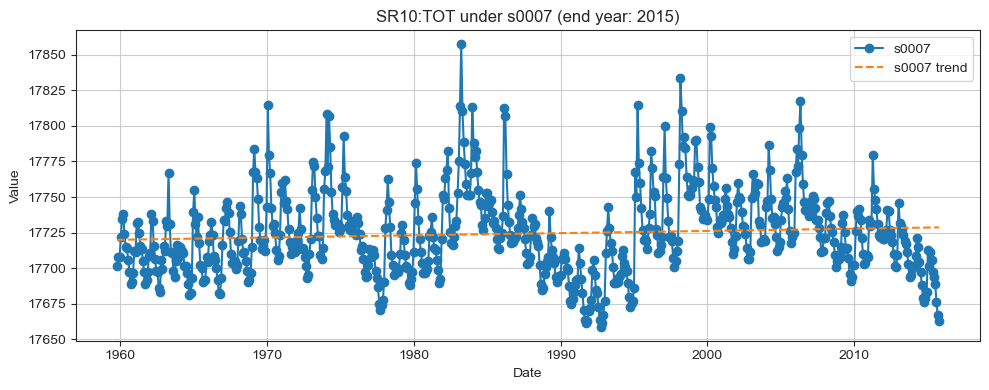

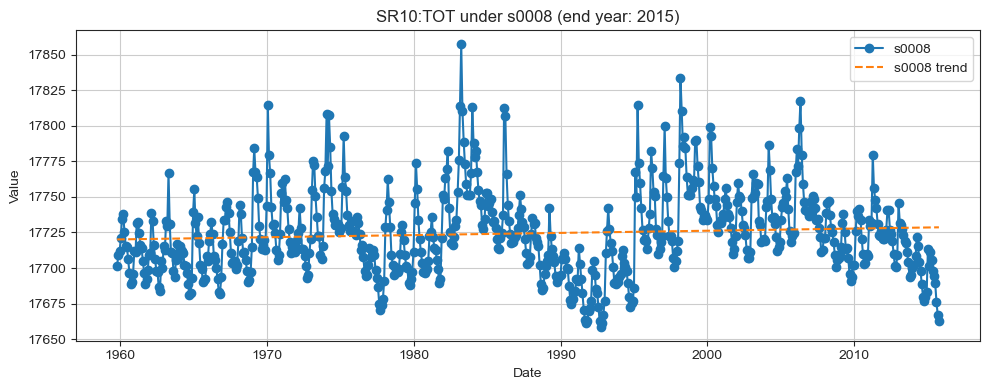

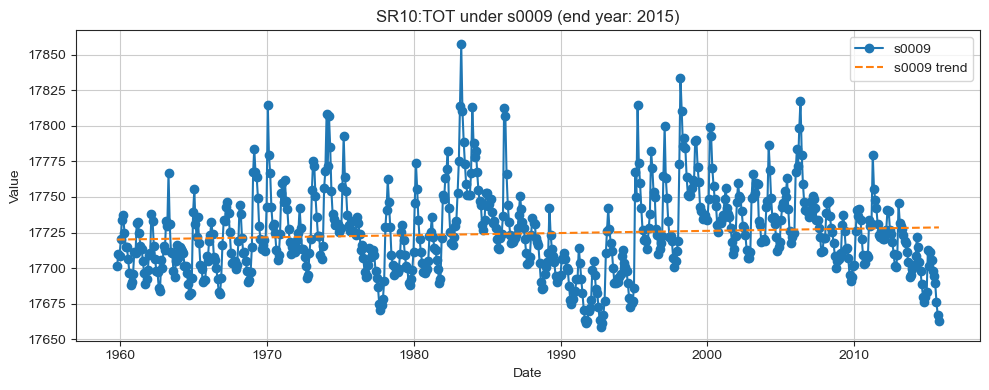

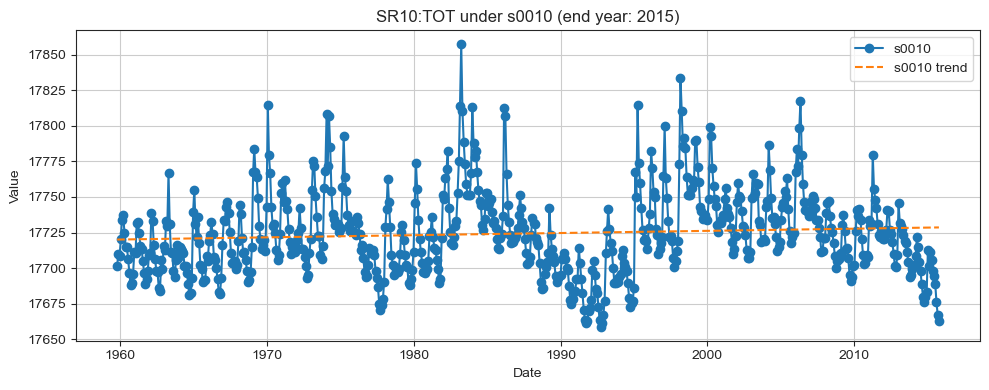

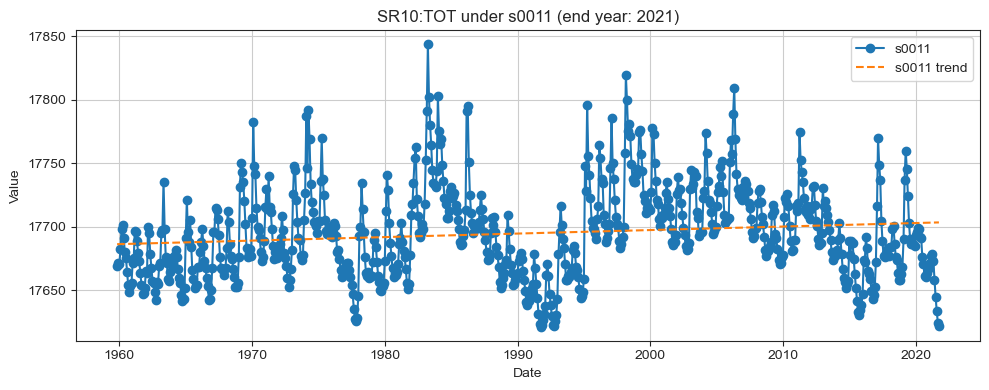

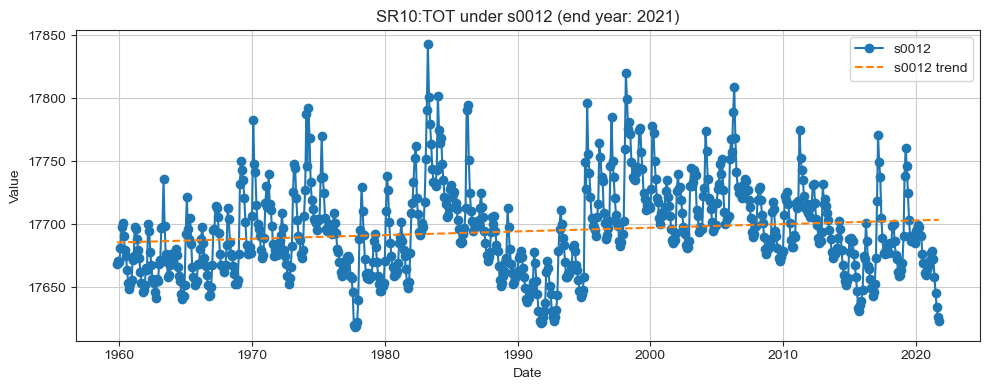

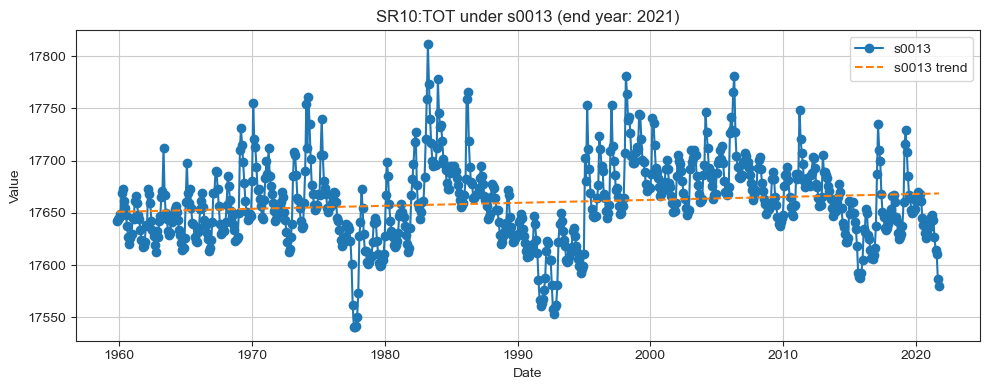

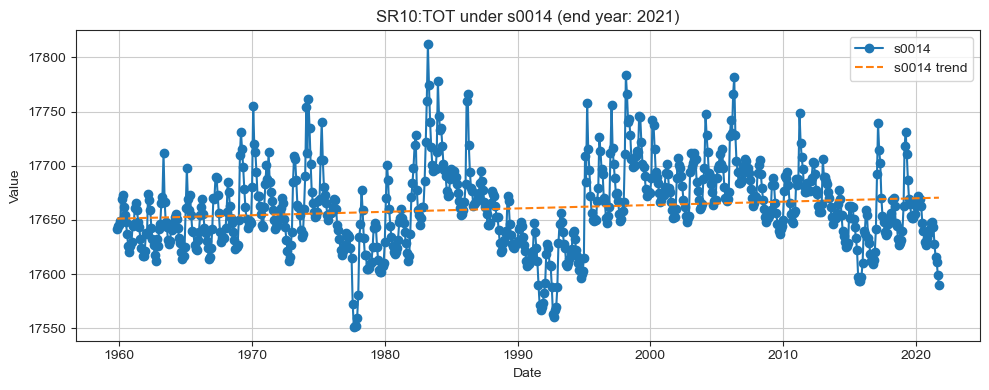

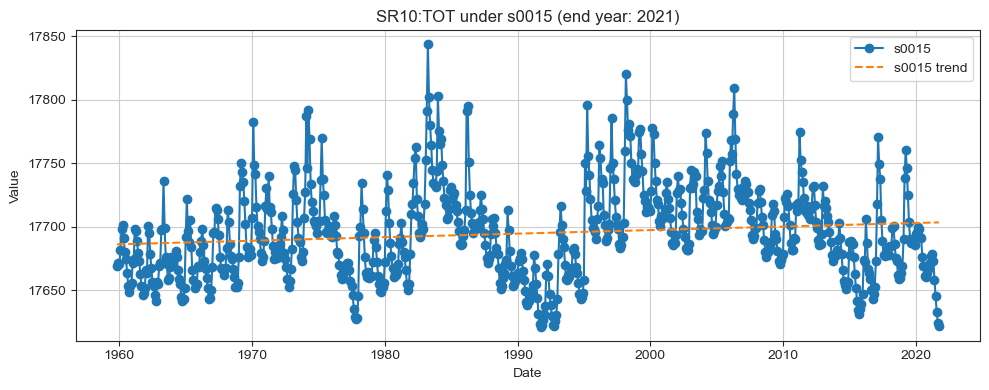

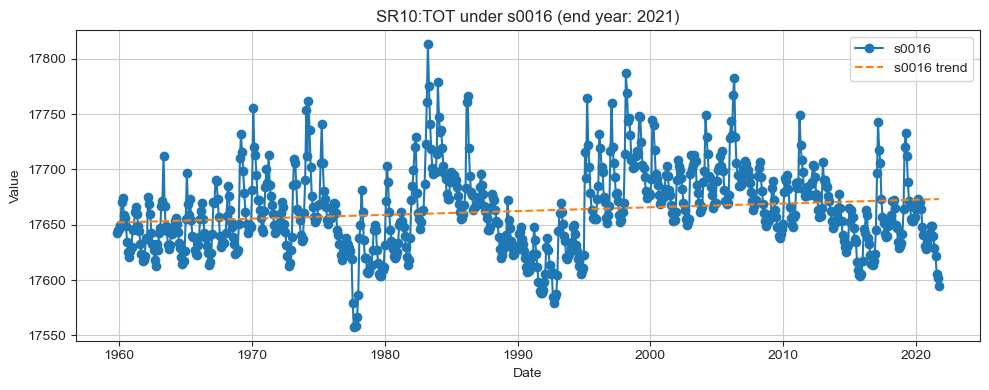

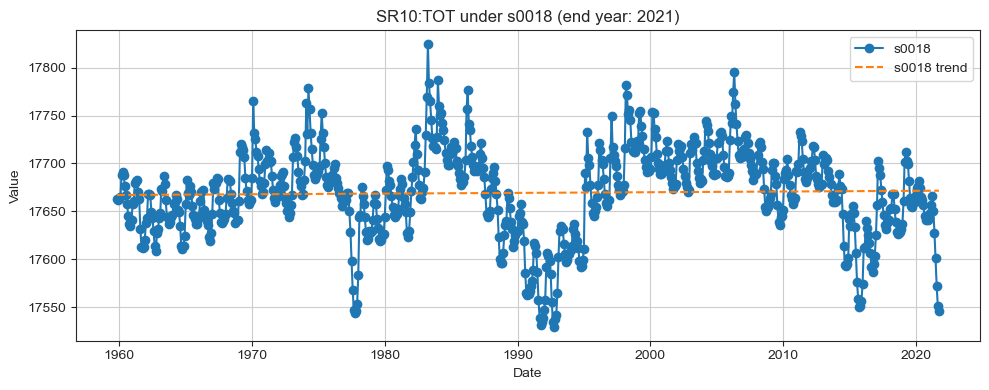


=== Slope DataFrame ===
scenario variable      slope  end_year
   s0001  SR1:TOT  -0.142928      2021
   s0001  SR2:TOT   0.125756      2021
   s0001  SR3:TOT   2.451442      2021
   s0001  SR4:TOT   0.307664      2021
   s0001  SR5:TOT   0.042056      2021
   s0001  SR6:TOT   0.398204      2021
   s0001  SR7:TOT   0.878860      2021
   s0001  SR8:TOT   0.169842      2021
   s0001  SR9:TOT   0.268914      2021
   s0001 SR10:TOT   0.024247      2021
   s0001 SR11:TOT   0.176224      2021
   s0001 SR12:TOT   0.073219      2021
   s0001 SR13:TOT   0.033125      2021
   s0001 SR14:TOT   0.005381      2021
   s0001 SR15:TOT   0.012133      2021
   s0001 SR16:TOT   0.039518      2021
   s0001 SR17:TOT  -0.075080      2021
   s0001 SR18:TOT  -0.004377      2021
   s0001 SR19:TOT   0.008348      2021
   s0001 SR20:TOT  -0.002059      2021
   s0001 SR21:TOT  -0.001475      2021
   s0001 SR22:TOT  -0.011208      2021
   s0001 SR23:TOT   0.042264      2021
   s0001 SR24:TOT  -0.008619      2021


In [33]:
drop_threshold = 1000 #Detects if the variable ends at 2015 instead of 2021
start_year = 1960

matching_cols = []

#change to wba_annual_df and WBAname instead of SR name and units = FT
for col in gw1_df.columns:
    # match with both variable name and units of feet
    if isinstance(col, tuple) and re.match(r'^SR\d+:TOT', col[1]):
        match = re.search(r'_s(\d{4})$', col[1])
        if match:
            scenario = f"s{match.group(1)}"
            if scenario != "s0017":  
                matching_cols.append((col, scenario))

print(f"Found {len(matching_cols)} matching variables under valid scenarios.")

# change plots to one plot with 4 sublots with 1/4 of the time series and trends for each subplot

plot_base_var = "SR10:TOT" #Choose a random variable to plot

slope_records = []

for (col, scenario) in matching_cols:
    varname = col[1]
    var_series = gw1_df[col]
    water_years = gw1_df["WaterYear"]

    df_sub = pd.DataFrame({
        "value": var_series.values,
        "WaterYear": water_years.values
    }, index=gw1_df.index)

    df_sub = df_sub[df_sub["WaterYear"] >= start_year]
    values = df_sub["value"].to_numpy()

    diffs = np.diff(values)
    drop_indices = np.where(diffs < -drop_threshold)[0]

    if len(drop_indices) > 0:
        cutoff_idx = drop_indices[0] + 1
        drop_date = df_sub.index[cutoff_idx]
        drop_year = drop_date.year
        df_sub = df_sub.iloc[:cutoff_idx]
    else:
        drop_year = 2021

    if len(df_sub) < 2 or df_sub["value"].isna().all():
        slope = np.nan
    else:
        y = df_sub["value"].values
        x = np.arange(len(y))
        slope, intercept = np.polyfit(x, y, 1)
        trend = slope * x + intercept

        if varname.startswith(plot_base_var):
            plt.figure(figsize=(10, 4))
            plt.plot(df_sub.index, y, label=f"{scenario}", marker='o')
            plt.plot(df_sub.index, trend, linestyle='--', label=f"{scenario} trend")
            plt.title(f"{plot_base_var} under {scenario} (end year: {drop_year})")
            plt.xlabel("Date")
            plt.ylabel("Value")
            plt.grid(True)
            plt.legend()
            plt.tight_layout()
            plt.show()

    slope_records.append({
        "scenario": scenario,
        "variable": varname.split("_")[0],  # just SRxx:TOT
        "slope": slope,
        "end_year": drop_year
    })

trend_df = pd.DataFrame(slope_records)
print("\n=== Slope DataFrame ===")
print(slope_df.to_string(index=False))


In [34]:
trend_df

,scenario,variable,slope,end_year
0,s0001,SR1:TOT,-0.142928,2021
1,s0001,SR2:TOT,0.125756,2021
2,s0001,SR3:TOT,2.451442,2021
3,s0001,SR4:TOT,0.307664,2021
4,s0001,SR5:TOT,0.042056,2021
...,...,...,...,...
1117,s0018,SR62:TOT,-0.076412,2021
1118,s0018,SR63:TOT,-0.028350,2021
1119,s0018,SR64:TOT,-0.047414,2021
1120,s0018,SR65:TOT,-0.414490,2021


## Change row index by scenarios, column index by variables, columns are WBAxx:SLOPE (or WBAxx:TREND)  

## Write this to csv

In [35]:
# slope_df.to_csv(ConvertDataOutPath.replace(".csv", "_annual_trend.csv"), na_rep="NaN", header=True, index=True)

## Plots will be 1 plot with 4 subplots with ~10 lines each for annual time series (in FT) and trend (FT/YR)